<a href="https://colab.research.google.com/github/bowie0713/DS-Project-1/blob/main/Three_Point_Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Intro


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

import copy
import seaborn as sns

In [32]:
nba_df = pd.read_csv("NBA three point stats baseball ref.csv")
nba_df.head()

,Rk,Season,Lg,Age,Ht,Wt,G,MP,FG,FGA,...,PTS,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg
0,1,2022-23,NBA,26.1,6-Jun,216.0,1145,241.8,41.9,88.2,...,114.6,0.475,0.361,0.782,99.1,0.545,12.5,24.0,0.210,114.8
1,2,2021-22,NBA,26.1,6-Jun,215.0,1230,241.4,40.6,88.1,...,110.6,0.461,0.354,0.775,98.2,0.532,12.3,23.2,0.192,112.0
2,3,2020-21,NBA,26.1,6-Jun,217.0,1080,241.4,41.2,88.4,...,112.1,0.466,0.367,0.778,99.2,0.538,12.4,22.2,0.192,112.3
3,4,2019-20,NBA,26.1,6-Jun,218.0,1059,241.8,40.9,88.8,...,111.8,0.460,0.358,0.773,100.3,0.529,12.8,22.5,0.201,110.6
4,5,2018-19,NBA,26.3,6-Jun,219.0,1230,241.6,41.1,89.2,...,111.2,0.461,0.355,0.766,100.0,0.524,12.4,22.9,0.198,110.4


In [33]:
# nba_df['Season'] = ['2022','2021','2020','2019','2018','2017', '']
nba_df['Season'] = np.arange(start = 2023, stop = 1946, step = -1)
nba_df

,Rk,Season,Lg,Age,Ht,Wt,G,MP,FG,FGA,...,PTS,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg
0,1,2023,NBA,26.1,6-Jun,216.0,1145,241.8,41.9,88.2,...,114.6,0.475,0.361,0.782,99.1,0.545,12.5,24.0,0.210,114.8
1,2,2022,NBA,26.1,6-Jun,215.0,1230,241.4,40.6,88.1,...,110.6,0.461,0.354,0.775,98.2,0.532,12.3,23.2,0.192,112.0
2,3,2021,NBA,26.1,6-Jun,217.0,1080,241.4,41.2,88.4,...,112.1,0.466,0.367,0.778,99.2,0.538,12.4,22.2,0.192,112.3
3,4,2020,NBA,26.1,6-Jun,218.0,1059,241.8,40.9,88.8,...,111.8,0.460,0.358,0.773,100.3,0.529,12.8,22.5,0.201,110.6
4,5,2019,NBA,26.3,6-Jun,219.0,1230,241.6,41.1,89.2,...,111.2,0.461,0.355,0.766,100.0,0.524,12.4,22.9,0.198,110.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,1951,NBA,NaN,NaN,NaN,354,NaN,29.8,83.6,...,84.1,0.357,NaN,0.733,NaN,0.357,NaN,NaN,0.293,NaN
73,74,1950,NBA,NaN,NaN,NaN,561,NaN,28.2,83.1,...,80.0,0.340,NaN,0.714,NaN,0.340,NaN,NaN,0.284,NaN
74,75,1949,BAA,NaN,NaN,NaN,360,NaN,29.0,88.7,...,80.0,0.327,NaN,0.703,NaN,0.327,NaN,NaN,0.248,NaN
75,76,1948,BAA,NaN,NaN,NaN,192,NaN,27.2,96.0,...,72.7,0.284,NaN,0.675,NaN,0.284,NaN,NaN,0.190,NaN


Since three point doesn't start until 1980, we'll drop the stats prior to the year 1980. 

In [34]:
nba_df = nba_df.drop(index = nba_df.index[2023-1979:])
nba_df.head()

,Rk,Season,Lg,Age,Ht,Wt,G,MP,FG,FGA,...,PTS,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg
0,1,2023,NBA,26.1,6-Jun,216.0,1145,241.8,41.9,88.2,...,114.6,0.475,0.361,0.782,99.1,0.545,12.5,24.0,0.210,114.8
1,2,2022,NBA,26.1,6-Jun,215.0,1230,241.4,40.6,88.1,...,110.6,0.461,0.354,0.775,98.2,0.532,12.3,23.2,0.192,112.0
2,3,2021,NBA,26.1,6-Jun,217.0,1080,241.4,41.2,88.4,...,112.1,0.466,0.367,0.778,99.2,0.538,12.4,22.2,0.192,112.3
3,4,2020,NBA,26.1,6-Jun,218.0,1059,241.8,40.9,88.8,...,111.8,0.460,0.358,0.773,100.3,0.529,12.8,22.5,0.201,110.6
4,5,2019,NBA,26.3,6-Jun,219.0,1230,241.6,41.1,89.2,...,111.2,0.461,0.355,0.766,100.0,0.524,12.4,22.9,0.198,110.4


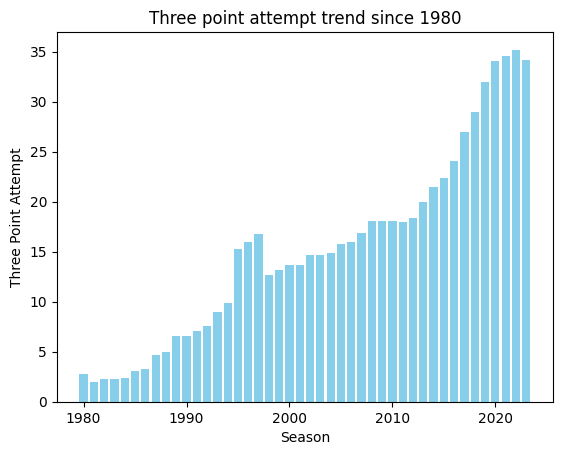

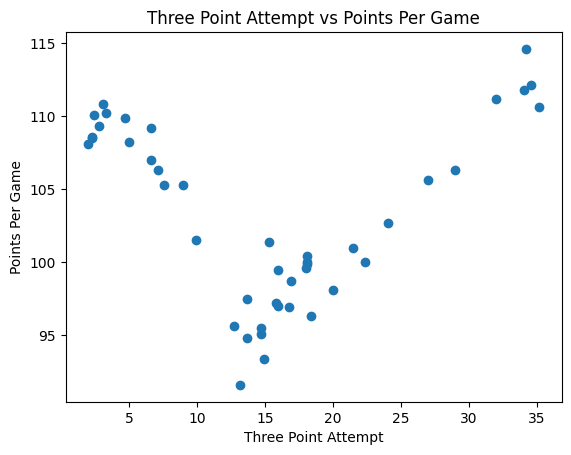

In [35]:
plt.bar(x = nba_df['Season'], height = nba_df['3PA'], color = 'skyblue')
plt.title('Three point attempt trend since 1980')
plt.xlabel('Season')
plt.ylabel('Three Point Attempt')
plt.show()

plt.scatter(x = nba_df['3PA'], y = nba_df['PTS'])
plt.title('Three Point Attempt vs Points Per Game')
plt.xlabel('Three Point Attempt')
plt.ylabel('Points Per Game')
plt.show()

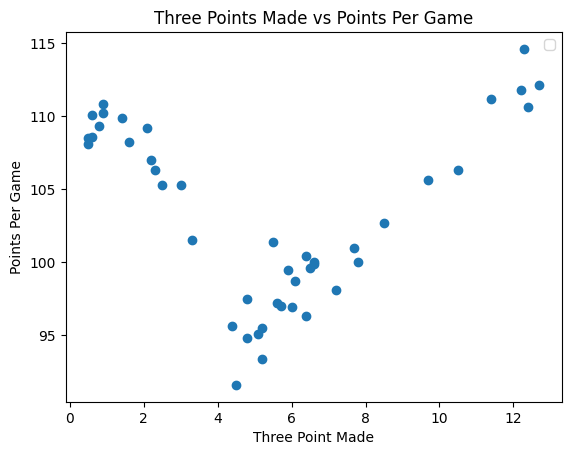

In [36]:
plt.scatter(x = nba_df['3P'], y = nba_df['PTS'])
plt.title('Three Points Made vs Points Per Game')
plt.xlabel('Three Point Made')
plt.ylabel('Points Per Game')
plt.legend()

In [37]:
nba_df = nba_df.drop(['Rk','Season','Lg','Age','Ht','Wt','G','MP' ], axis = 1) # Drop categorical data or data that are other wise useless by columns
nba_df.head()

,FG,FGA,3P,3PA,FT,FTA,ORB,DRB,TRB,AST,...,PTS,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg
0,41.9,88.2,12.3,34.2,18.5,23.6,10.4,33.0,43.4,25.2,...,114.6,0.475,0.361,0.782,99.1,0.545,12.5,24.0,0.210,114.8
1,40.6,88.1,12.4,35.2,16.9,21.9,10.3,34.1,44.5,24.6,...,110.6,0.461,0.354,0.775,98.2,0.532,12.3,23.2,0.192,112.0
2,41.2,88.4,12.7,34.6,17.0,21.8,9.8,34.5,44.3,24.8,...,112.1,0.466,0.367,0.778,99.2,0.538,12.4,22.2,0.192,112.3
3,40.9,88.8,12.2,34.1,17.9,23.1,10.1,34.8,44.8,24.4,...,111.8,0.460,0.358,0.773,100.3,0.529,12.8,22.5,0.201,110.6
4,41.1,89.2,11.4,32.0,17.7,23.1,10.3,34.8,45.2,24.6,...,111.2,0.461,0.355,0.766,100.0,0.524,12.4,22.9,0.198,110.4


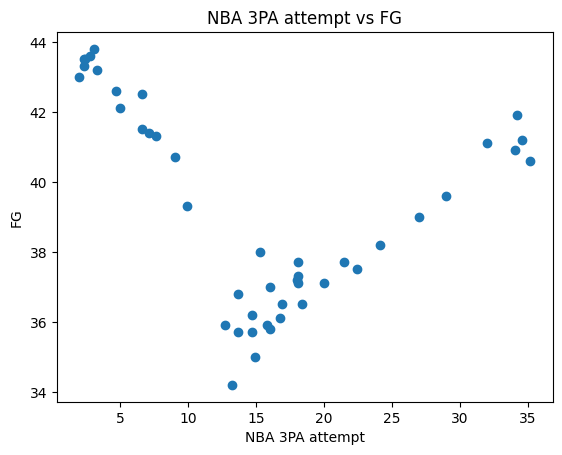

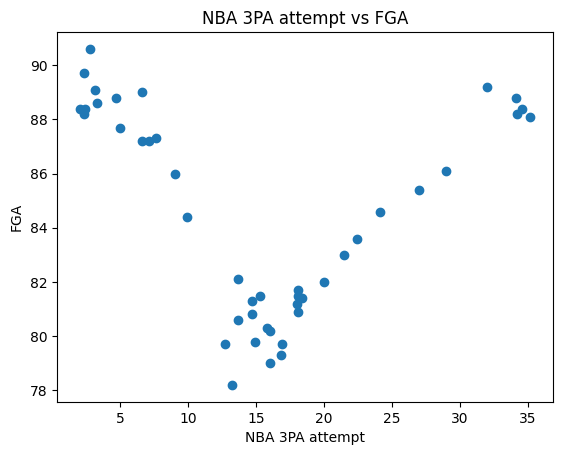

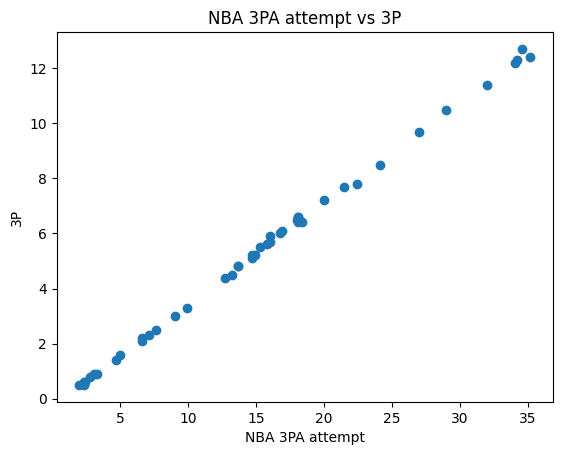

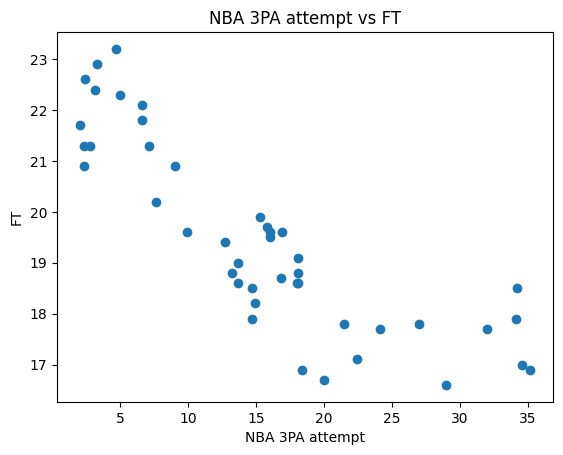

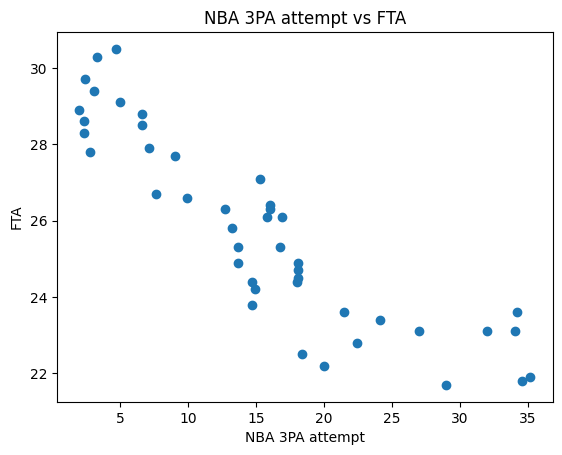

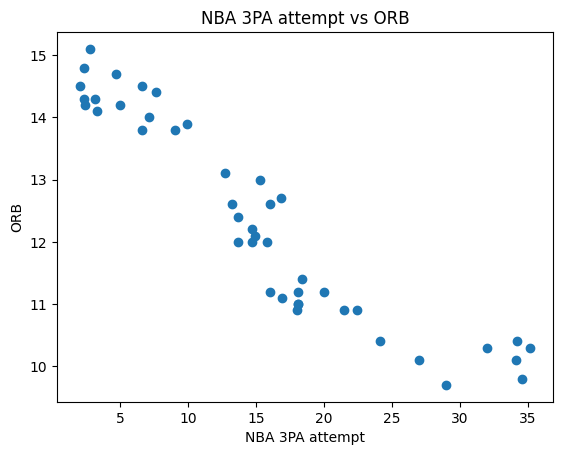

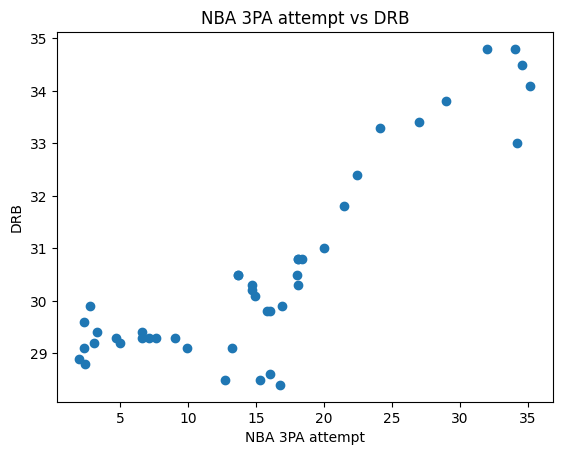

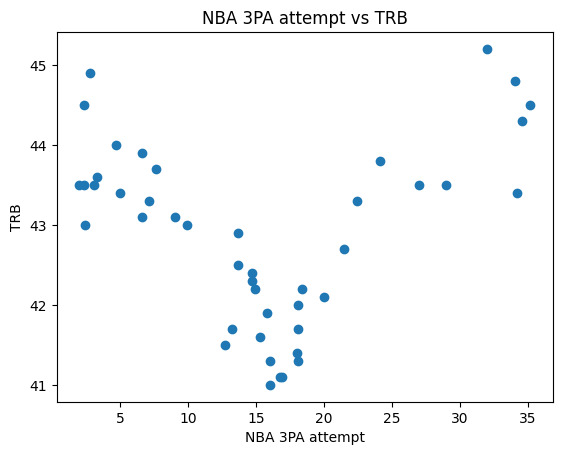

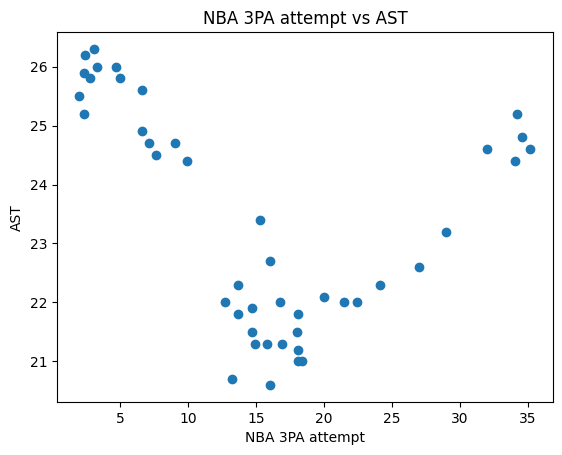

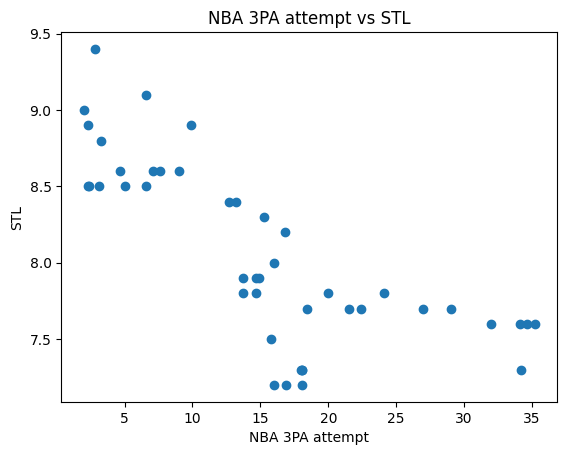

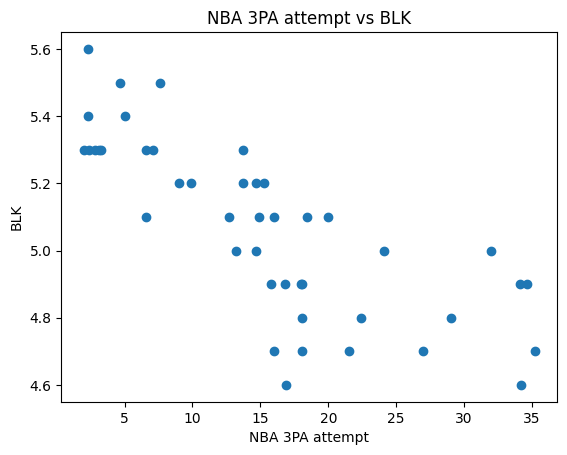

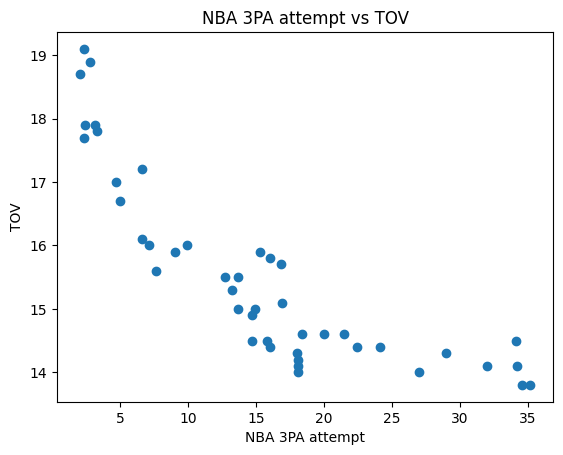

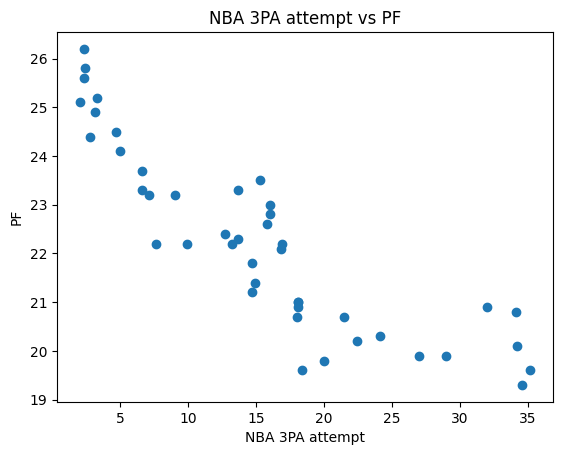

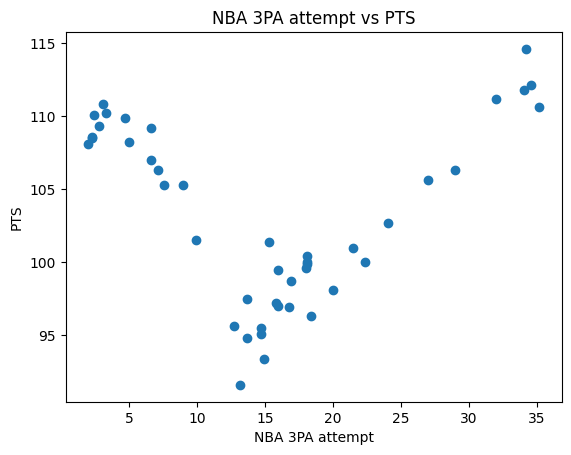

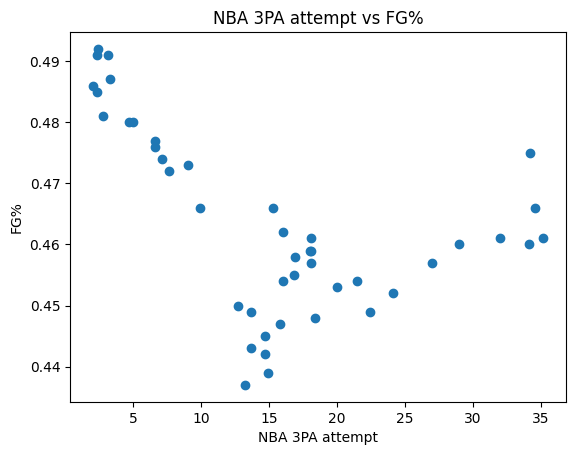

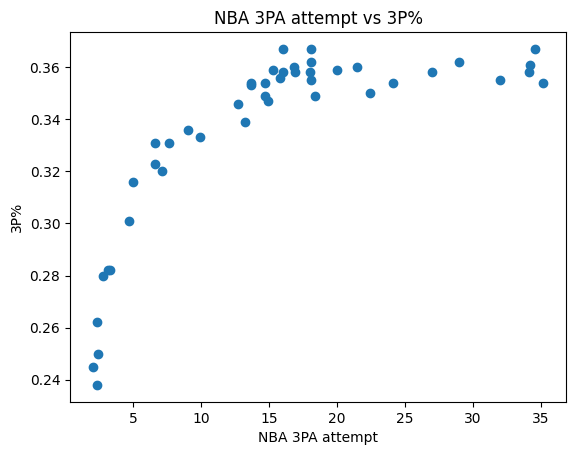

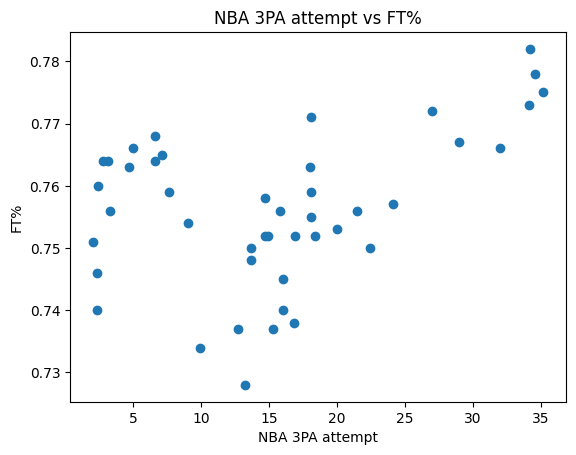

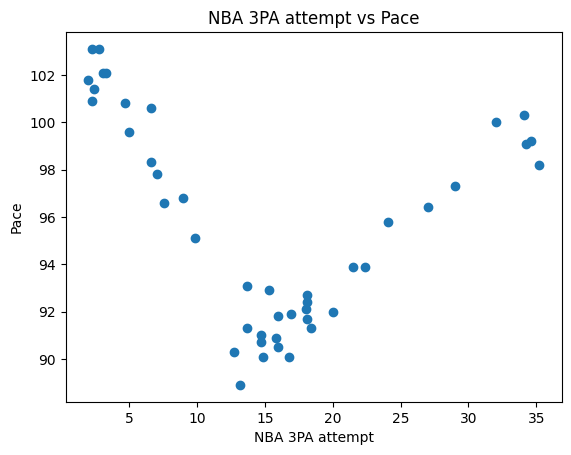

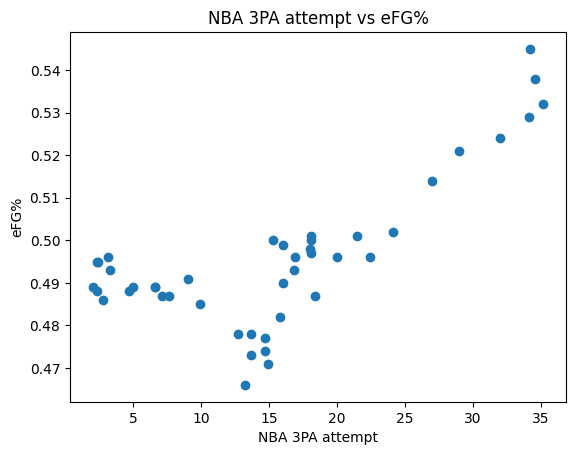

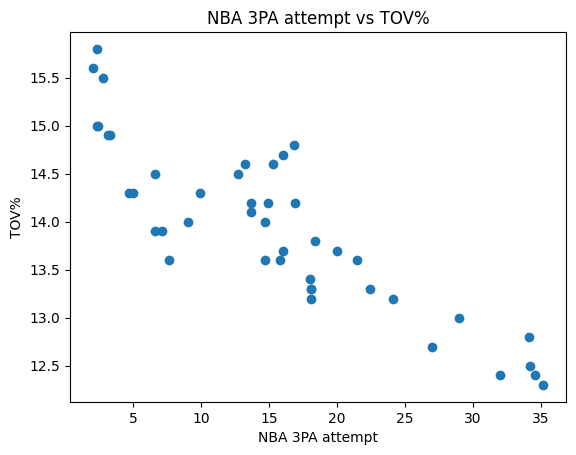

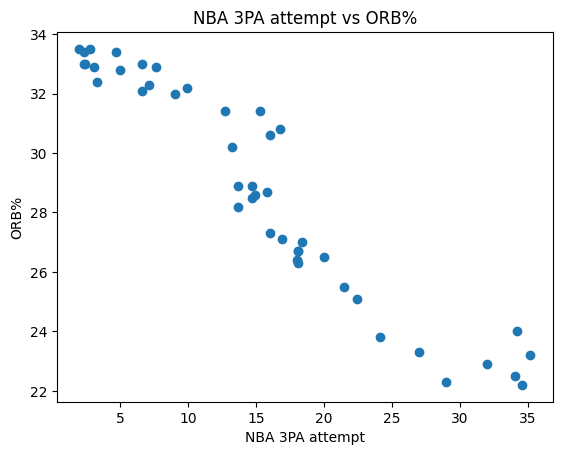

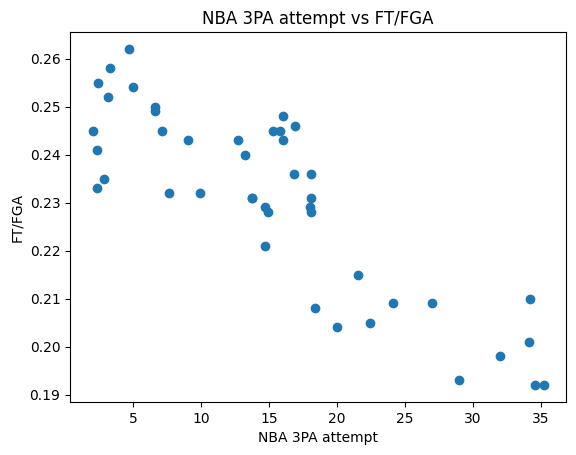

In [38]:
count = 0
for label in nba_df.columns[:-1]:
  if label == '3PA':
    count += 1
  else:
    plt.scatter(nba_df['3PA'], nba_df[label])
    plt.title('NBA 3PA attempt vs ' + label)
    plt.xlabel('NBA 3PA attempt')
    plt.ylabel(label)
    plt.show()

In [39]:
train, valid, test = np.split(nba_df.sample(frac = 1), [int(0.6*len(nba_df)), int(0.8*len(nba_df))])

In [40]:
def get_xy(dataframe, x_label, y_labels= None):
  dataframe = copy.deepcopy(dataframe)
  if y_labels is None:
    y = dataframe[[c for c in dataframe.columns if c!= x_label]].values
  else:
    if len(y_labels) ==1:
      y = dataframe[y_labels[0]].values.reshape(-1,1)
    else:
      y = dataframe[y_labels].values

  x = dataframe[x_label].values.reshape(-1,1)
  data = np.hstack((x,y))

  return data, x, y

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
d, x_train_pts, y_train_pts = get_xy(train, x_label = '3PA', y_labels = ['PTS'])
d, x_val_pts, y_val_pts = get_xy(valid, x_label = '3PA', y_labels = ['PTS'])
d, x_test_pts, y_test_pts = get_xy(test, x_label = '3PA', y_labels = ['PTS'])

In [43]:
pts_3pa_reg = LinearRegression()
pts_3pa_reg.fit(x_train_pts, y_train_pts)

LinearRegression()

In [44]:
print(pts_3pa_reg.coef_)
print(pts_3pa_reg.intercept_)

[[-0.06705952]]
[104.16120437]


In [45]:
pts_3pa_reg.score(x_test_pts, y_test_pts)

-0.0822421502547841

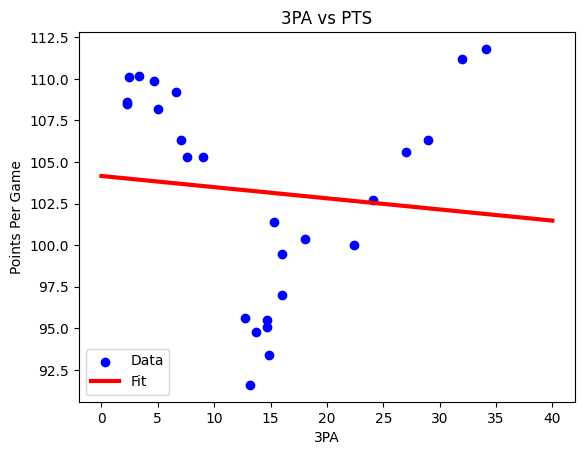

In [46]:
import tensorflow as tf
plt.scatter(x_train_pts, y_train_pts, label = 'Data',color = 'blue')
x = tf.linspace(0, 40, 100)
plt.plot(x, pts_3pa_reg.predict(np.array(x).reshape(-1,1)), label = "Fit", color = 'red', linewidth = 3)
plt.legend()
plt.title("3PA vs PTS")
plt.ylabel("Points Per Game")
plt.xlabel("3PA")
plt.show()

# Multiple Linear Regression

In [47]:
train, valid, test = np.split(nba_df.sample(frac = 1), [int(0.6*len(nba_df)), int(0.8*len(nba_df))])

In [48]:
d, x_train_all, y_train_all = get_xy(train, x_label = '3PA', y_labels = nba_df.columns[5:])
d, x_val_all, y_val_all = get_xy(valid, x_label = '3PA', y_labels = nba_df.columns[5:])
d, x_test_all, y_test_all = get_xy(test, x_label = '3PA', y_labels = nba_df.columns[5:])

In [49]:
all_reg = LinearRegression()
all_reg.fit(x_train_all, y_train_all)

LinearRegression()

In [50]:
all_reg.score(x_test_all, y_test_all)

0.16146788690198988

# Linear Regression with Scatter Graphs

In [51]:
nba_reg = LinearRegression()

R^2:  0.6864921707786382


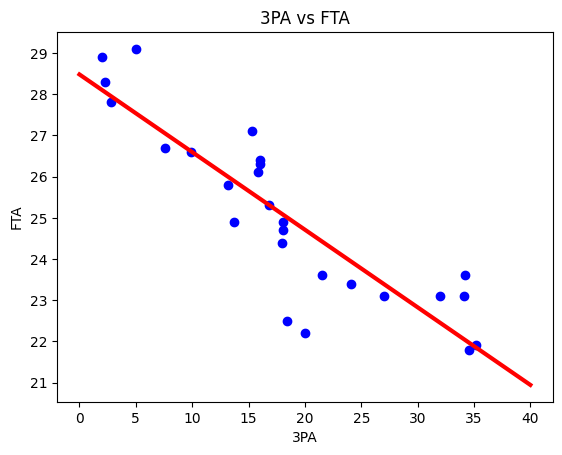

R^2:  0.822454398168331


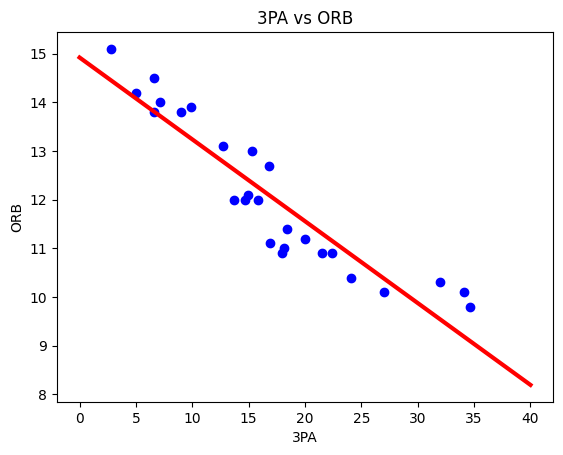

R^2:  0.7796292461758207


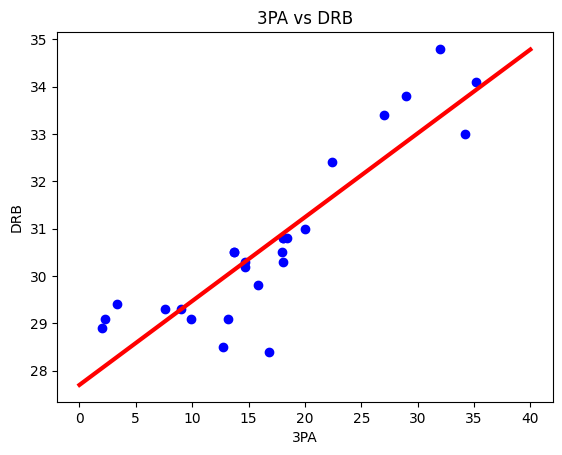

R^2:  -0.010277739231040917


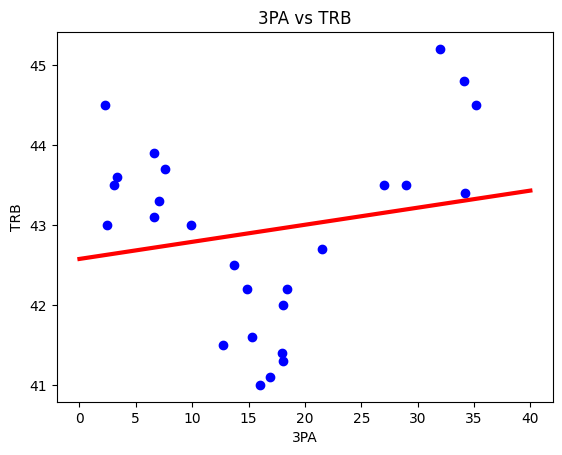

R^2:  -2.6049456846388814


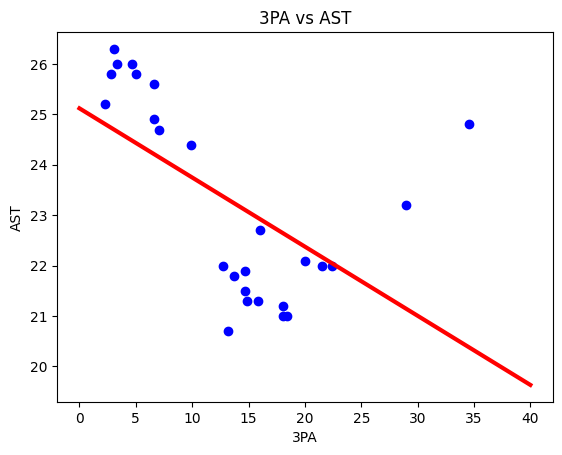

R^2:  0.38263294955154814


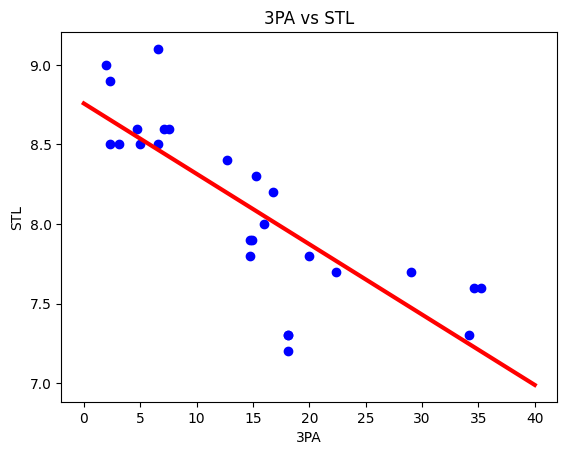

R^2:  0.7307303259190858


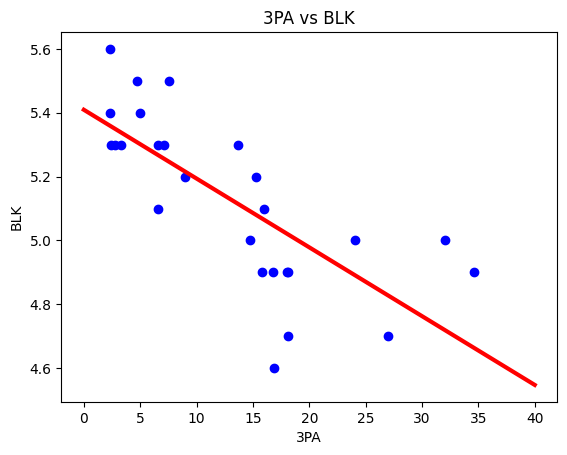

R^2:  0.3822218576221974


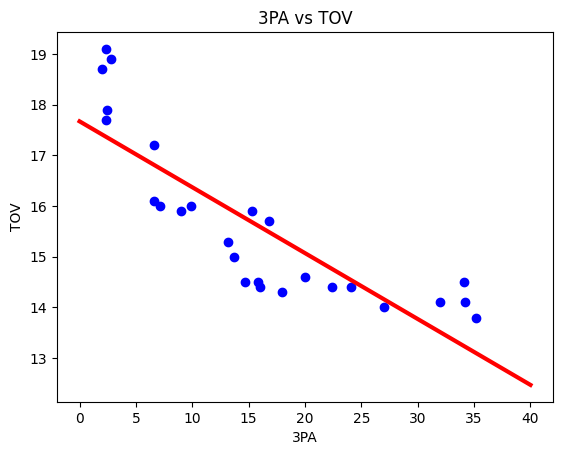

R^2:  0.6061702169632357


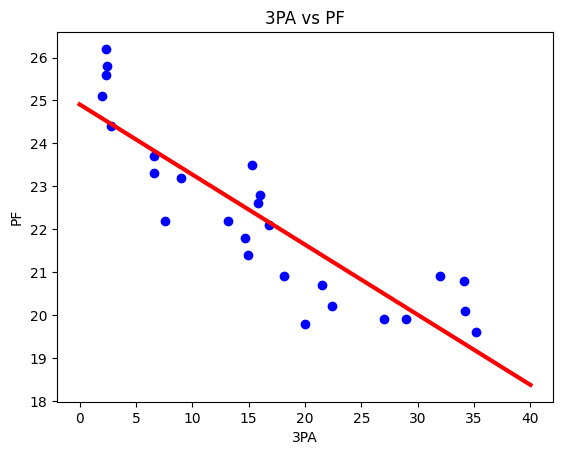

R^2:  -0.25245352173441393


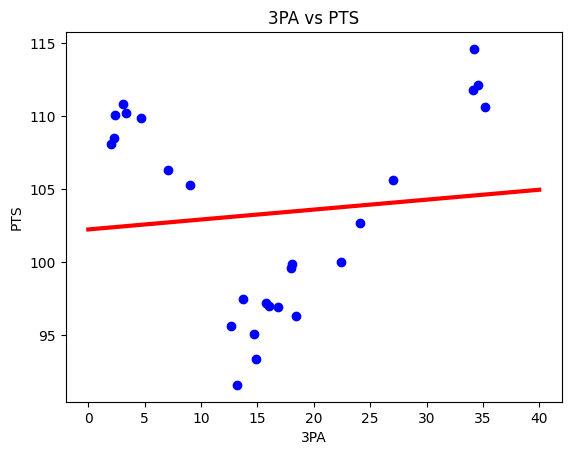

R^2:  0.5427554616846155


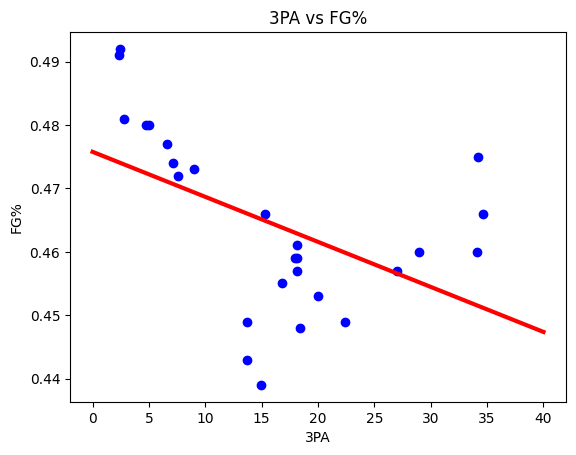

R^2:  0.3950980234894288


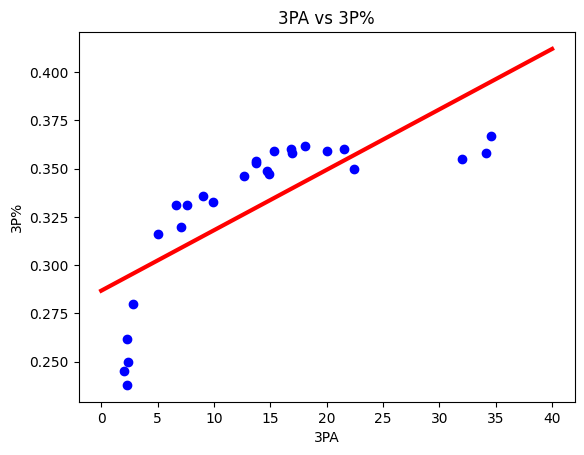

R^2:  0.1523334846842277


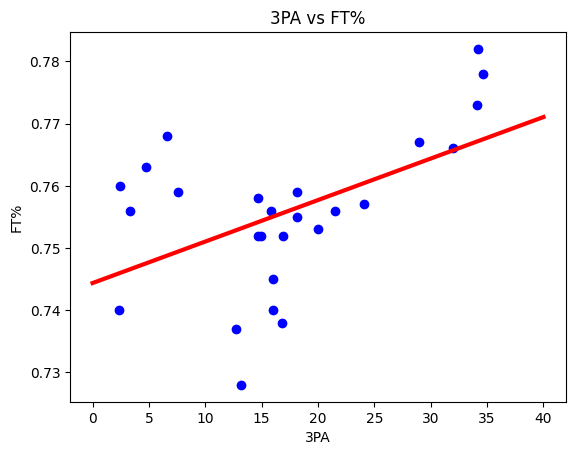

R^2:  0.1539778303825241


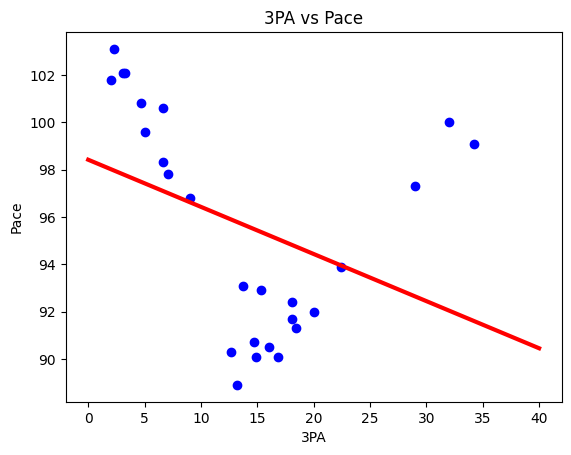

R^2:  0.5451472752596964


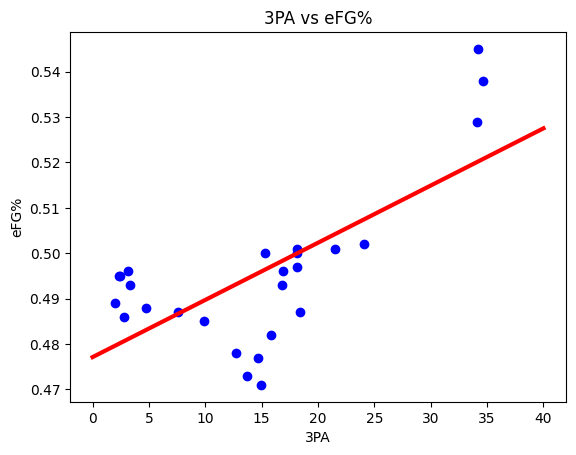

R^2:  0.6089326411271103


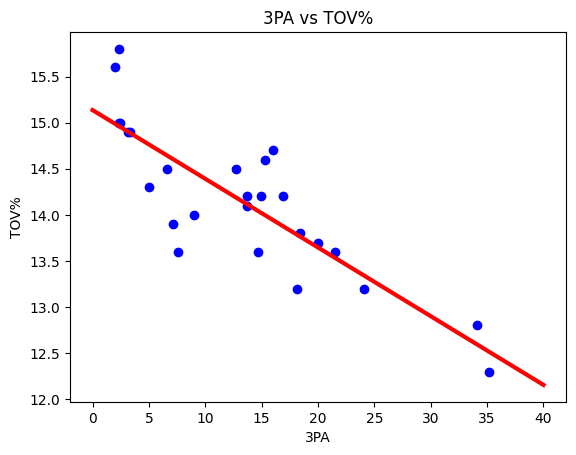

R^2:  0.8884838198766438


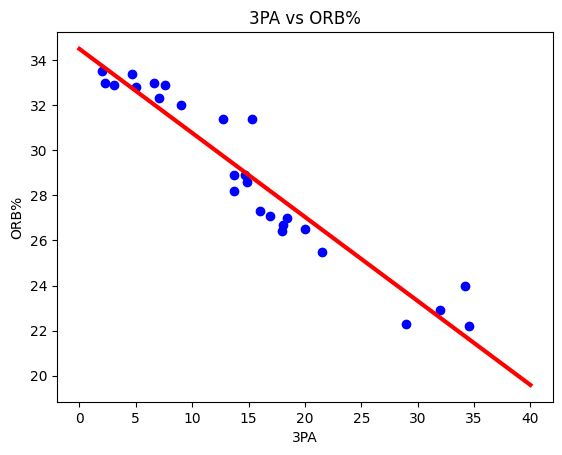

R^2:  0.3896844561411319


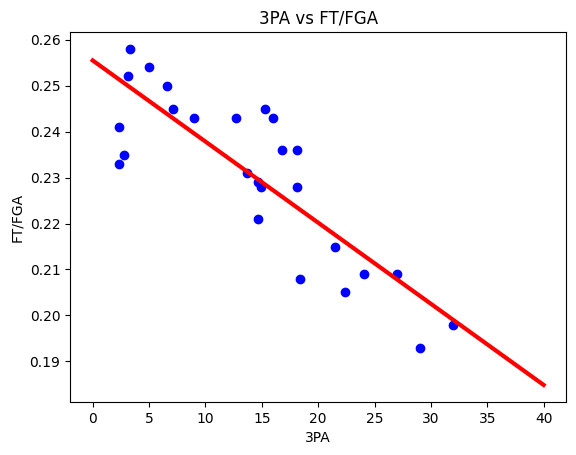

R^2:  -0.4512223334561869


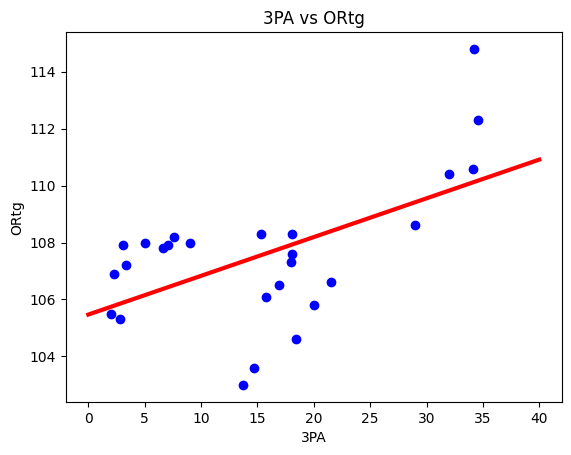

In [52]:
for label in nba_df.columns[5:]:
  train, valid, test = np.split(nba_df.sample(frac = 1), [int(0.6*len(nba_df)), int(0.8*len(nba_df))])
  d, x_train, y_train = get_xy(train, x_label = '3PA', y_labels = [label])
  d, x_val, y_val = get_xy(valid, x_label = '3PA', y_labels = [label])
  d, x_test, y_test = get_xy(test, x_label = '3PA', y_labels = [label])
  nba_reg.fit(x_train, y_train)
  print("R^2: ", nba_reg.score(x_test, y_test))
  plt.scatter(x_train, y_train, label = 'Data',color = 'blue')
  x = tf.linspace(0,40,100)
  plt.plot(x, nba_reg.predict(np.array(x).reshape(-1,1)), label = "Fit", color = 'red', linewidth = 3)
  plt.title("3PA vs " + label)
  plt.ylabel(label)
  plt.xlabel("3PA")
  plt.show()



# Query Data 


In [63]:
nba_df = pd.DataFrame(nba_df)
nba_df


,FG,FGA,3P,3PA,FT,FTA,ORB,DRB,TRB,AST,...,PTS,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg
0,41.9,88.2,12.3,34.2,18.5,23.6,10.4,33.0,43.4,25.2,...,114.6,0.475,0.361,0.782,99.1,0.545,12.5,24.0,0.210,114.8
1,40.6,88.1,12.4,35.2,16.9,21.9,10.3,34.1,44.5,24.6,...,110.6,0.461,0.354,0.775,98.2,0.532,12.3,23.2,0.192,112.0
2,41.2,88.4,12.7,34.6,17.0,21.8,9.8,34.5,44.3,24.8,...,112.1,0.466,0.367,0.778,99.2,0.538,12.4,22.2,0.192,112.3
3,40.9,88.8,12.2,34.1,17.9,23.1,10.1,34.8,44.8,24.4,...,111.8,0.460,0.358,0.773,100.3,0.529,12.8,22.5,0.201,110.6
4,41.1,89.2,11.4,32.0,17.7,23.1,10.3,34.8,45.2,24.6,...,111.2,0.461,0.355,0.766,100.0,0.524,12.4,22.9,0.198,110.4
5,39.6,86.1,10.5,29.0,16.6,21.7,9.7,33.8,43.5,23.2,...,106.3,0.460,0.362,0.767,97.3,0.521,13.0,22.3,0.193,108.6
6,39.0,85.4,9.7,27.0,17.8,23.1,10.1,33.4,43.5,22.6,...,105.6,0.457,0.358,0.772,96.4,0.514,12.7,23.3,0.209,108.8
7,38.2,84.6,8.5,24.1,17.7,23.4,10.4,33.3,43.8,22.3,...,102.7,0.452,0.354,0.757,95.8,0.502,13.2,23.8,0.209,106.4
8,37.5,83.6,7.8,22.4,17.1,22.8,10.9,32.4,43.3,22.0,...,100.0,0.449,0.350,0.750,93.9,0.496,13.3,25.1,0.205,105.6
9,37.7,83.0,7.7,21.5,17.8,23.6,10.9,31.8,42.7,22.0,...,101.0,0.454,0.360,0.756,93.9,0.501,13.6,25.5,0.215,106.6


In [73]:
new_result = nba_df.query("`PTS` <= 105 and `3PA` >= 10").copy()
new_result

,FG,FGA,3P,3PA,FT,FTA,ORB,DRB,TRB,AST,...,PTS,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg
7,38.2,84.6,8.5,24.1,17.7,23.4,10.4,33.3,43.8,22.3,...,102.7,0.452,0.354,0.757,95.8,0.502,13.2,23.8,0.209,106.4
8,37.5,83.6,7.8,22.4,17.1,22.8,10.9,32.4,43.3,22.0,...,100.0,0.449,0.350,0.750,93.9,0.496,13.3,25.1,0.205,105.6
9,37.7,83.0,7.7,21.5,17.8,23.6,10.9,31.8,42.7,22.0,...,101.0,0.454,0.360,0.756,93.9,0.501,13.6,25.5,0.215,106.6
10,37.1,82.0,7.2,20.0,16.7,22.2,11.2,31.0,42.1,22.1,...,98.1,0.453,0.359,0.753,92.0,0.496,13.7,26.5,0.204,105.8
11,36.5,81.4,6.4,18.4,16.9,22.5,11.4,30.8,42.2,21.0,...,96.3,0.448,0.349,0.752,91.3,0.487,13.8,27.0,0.208,104.6
12,37.2,81.2,6.5,18.0,18.6,24.4,10.9,30.5,41.4,21.5,...,99.6,0.459,0.358,0.763,92.1,0.498,13.4,26.4,0.229,107.3
13,37.7,81.7,6.4,18.1,18.6,24.5,11.0,30.8,41.7,21.2,...,100.4,0.461,0.355,0.759,92.7,0.501,13.3,26.3,0.228,107.6
14,37.1,80.9,6.6,18.1,19.1,24.7,11.0,30.3,41.3,21.0,...,100.0,0.459,0.367,0.771,91.7,0.500,13.3,26.7,0.236,108.3
15,37.3,81.5,6.6,18.1,18.8,24.9,11.2,30.8,42.0,21.8,...,99.9,0.457,0.362,0.755,92.4,0.497,13.2,26.7,0.231,107.5
16,36.5,79.7,6.1,16.9,19.6,26.1,11.1,29.9,41.1,21.3,...,98.7,0.458,0.358,0.752,91.9,0.496,14.2,27.1,0.246,106.5


In [74]:
train, valid, test = np.split(new_result.sample(frac = 1), [int(0.6*len(nba_df)), int(0.8*len(nba_df))])

In [75]:
d, x_train_pts3, y_train_pts3 = get_xy(train, x_label = '3PA', y_labels = ['PTS'])
d, x_val_pts3, y_val_pts3 = get_xy(valid, x_label = '3PA', y_labels = ['PTS'])
d, x_test_pts3, y_test_pts3 = get_xy(test, x_label = '3PA', y_labels = ['PTS'])


In [76]:
pts3_3pa_reg = LinearRegression()
pts3_3pa_reg.fit(x_train_pts3, y_train_pts3)


LinearRegression()

In [77]:
pts3_3pa_reg.score(x_test_pts3, y_test_pts3)

ValueError: ignored

In [ ]:
import tensorflow as tf
plt.scatter(x_train_pts3, y_train_pts3, label = 'Data',color = 'blue')
x = tf.linspace(0, 40, 100)
plt.plot(x, pts3_3pa_reg.predict(np.array(x).reshape(-1,1)), label = "Fit", color = 'red', linewidth = 3)
plt.legend()
plt.title("Adjusted 3PA vs PTS")
plt.ylabel("Points Per Game")
plt.xlabel("3PA")
plt.show()

In [ ]:
 pip install sqlalchemy 

In [ ]:
# import sql library
#from sqlalchemy import create_engine

#nba_df.head()
#engine = create_engine('sqlite://', echo = False)
#nba_df.to_sql('NBA_Data', con = engine)

#print(engine.execute("SELECT * FROM NBA_Data").fetchall())


In [ ]:
#df_ex = pd.read_sql_query("SELECT * FROM NBA_Data WHERE 3P > 10", 
                          #con = engine)
#print(df_ex)
